In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # support vector machine
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [12]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [67]:
pd.set_option('display.max_columns', 100)

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
df.drop('ID', axis=1, inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [19]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [32]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [33]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [41]:
len(df.loc[(df.EDUCATION==0) | (df.MARRIAGE==0)])

68

In [45]:
df.drop(df[df.EDUCATION==0].index | df[df.MARRIAGE==0].index, inplace=True)
df

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [48]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6])

In [49]:
df.MARRIAGE.unique()

array([1, 2, 3])

In [50]:
df_no_default = df[df.DEFAULT==0]
df_default = df[df.DEFAULT==1]

In [51]:
df_no_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000,1,2,1,41,0,0,0,0,0,0,138325,137142,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,10000,1,3,1,43,0,0,0,-2,-2,-2,8802,10400,0,0,0,0,2000,0,0,0,0,0,0
29993,100000,1,1,2,38,0,-1,-1,0,0,0,3042,1427,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


In [52]:
df_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000,1,2,1,34,3,2,2,2,2,2,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1
29994,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [53]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
df_no_default_downsampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18942,150000,2,1,1,31,-1,-1,-2,-2,-2,-2,12420,0,0,0,0,0,0,0,0,0,0,0,0
29836,180000,1,6,1,34,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
19424,90000,2,1,2,33,-1,-1,-1,-1,-1,-1,3000,6000,0,3000,3000,3000,6000,0,3000,3000,3000,3000,0
25593,120000,2,3,1,38,0,0,0,0,0,0,118016,117738,120127,119719,118042,120682,5720,5820,5670,4250,4450,4470,0


In [54]:
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42)
df_default_downsampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
19982,300000,2,1,1,47,3,2,2,2,2,2,5000,5000,5000,5000,5000,5000,0,0,0,0,0,0,1
19350,80000,2,2,2,36,2,0,0,-2,-2,-2,19671,20650,0,0,0,0,1700,0,0,0,0,0,1
17057,30000,2,3,2,22,2,2,0,0,0,0,29793,29008,29047,29507,11609,11711,0,1687,1147,524,400,666,1
26996,80000,1,1,2,34,2,2,2,2,2,2,61231,62423,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600,1
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,-2,11771,13462,17706,0,5646,14793,13462,17706,0,5646,14793,7376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,2,24022,24744,24053,25624,25977,25413,1396,0,1967,903,0,1100,1
14072,320000,1,1,1,43,-1,0,0,0,0,0,18625,28143,32159,31851,3105,-45,10000,5000,0,0,0,0,1
5387,50000,1,2,2,23,-1,-1,0,0,-1,-1,2165,14796,20816,11804,1420,0,15000,20300,9500,1420,0,0,1
23192,150000,2,3,1,43,0,0,0,0,0,0,18308,19973,21000,22013,22449,22922,1973,1353,1366,802,833,837,1


In [55]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
df_downsample

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,2,24022,24744,24053,25624,25977,25413,1396,0,1967,903,0,1100,1
14072,320000,1,1,1,43,-1,0,0,0,0,0,18625,28143,32159,31851,3105,-45,10000,5000,0,0,0,0,1
5387,50000,1,2,2,23,-1,-1,0,0,-1,-1,2165,14796,20816,11804,1420,0,15000,20300,9500,1420,0,0,1
23192,150000,2,3,1,43,0,0,0,0,0,0,18308,19973,21000,22013,22449,22922,1973,1353,1366,802,833,837,1


In [56]:
X = df_downsample.drop('DEFAULT', axis=1)
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,2,24022,24744,24053,25624,25977,25413,1396,0,1967,903,0,1100
14072,320000,1,1,1,43,-1,0,0,0,0,0,18625,28143,32159,31851,3105,-45,10000,5000,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,-1,2165,14796,20816,11804,1420,0,15000,20300,9500,1420,0,0
23192,150000,2,3,1,43,0,0,0,0,0,0,18308,19973,21000,22013,22449,22922,1973,1353,1366,802,833,837


In [57]:
y = df_downsample.DEFAULT
y

641      0
4678     0
16004    0
22974    0
17535    0
        ..
6154     1
14072    1
5387     1
23192    1
8180     1
Name: DEFAULT, Length: 2000, dtype: int64

In [61]:
pd.get_dummies(X, columns=['MARRIAGE']).head() # Checking the result of ONE HOT ENCODING without modifying the df

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [68]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 
                                        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [70]:
X_encoded

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,34,24022,24744,24053,25624,25977,25413,1396,0,1967,903,0,1100,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14072,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5387,50000,23,2165,14796,20816,11804,1420,0,15000,20300,9500,1420,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23192,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,1366,802,833,837,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train) # sklearn scale will scale the data to mean 0 and SD 1
X_test_scaled = scale(X_test)

In [72]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [75]:
clf_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


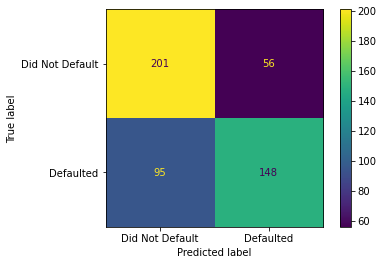

In [76]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, 
                      values_format='d', display_labels=['Did Not Default', 'Defaulted'])

In [79]:
param_grid = [{'C':[0.5, 1, 10, 100],
              'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']
    
}]

optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [81]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


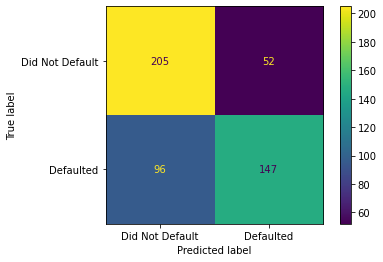

In [82]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, 
                      values_format='d', display_labels=['Did Not Default', 'Defaulted'])

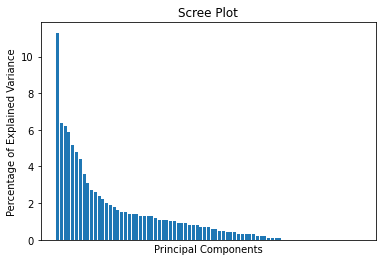

In [83]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

# Let's try the same SVM modeling on the entire dataset with less downsampling

In [84]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.drop('ID', axis=1, inplace=True)

In [87]:
df.drop(df[df.EDUCATION==0].index | df[df.MARRIAGE==0].index, inplace=True)

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


In [88]:
df_no_default = df[df.DEFAULT==0]
df_default = df[df.DEFAULT==1]

In [89]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=6600, random_state=42)
df_default_downsampled = resample(df_default, replace=False, n_samples=6600, random_state=42)

In [90]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])

In [91]:
X = df_downsample.drop('DEFAULT', axis=1)
y = df_downsample.DEFAULT

In [92]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 
                                        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train) # sklearn scale will scale the data to mean 0 and SD 1
X_test_scaled = scale(X_test)

In [94]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


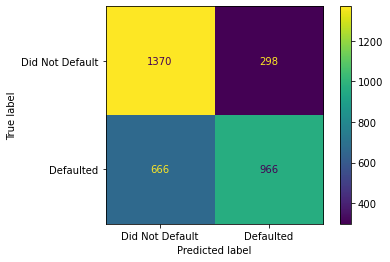

In [95]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, 
                      values_format='d', display_labels=['Did Not Default', 'Defaulted'])

In [97]:
param_grid = [{'C':[0.5, 1, 10, 100],
              'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']
    
}]

optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [98]:
clf_svm = SVC(random_state=42, C=1, gamma=0.01, kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, random_state=42)

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


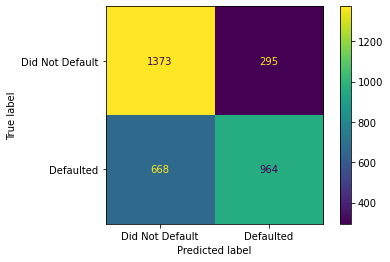

In [99]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, 
                      values_format='d', display_labels=['Did Not Default', 'Defaulted'])

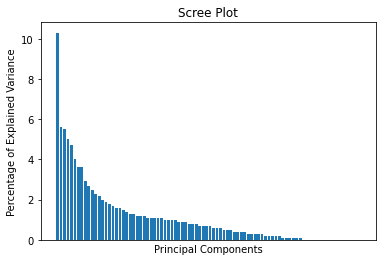

In [100]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()